In [10]:
#创建数据集
import numpy as np
import pandas as pd

def createDataSet():
    row_data = collections.OrderedDict()
    row_data = {'no surfacing':[1,1,1,0,0],
               'flippers':[1,1,0,1,1],
               'fish':['yes','yes','no','no','no']}
    dataSet = pd.DataFrame(row_data)
    return dataSet

In [11]:
dataSet=createDataSet()
dataSet

,fish,flippers,no surfacing
0,yes,1,1
1,yes,1,1
2,no,0,1
3,no,1,0
4,no,1,0


###  创建数据集

In [26]:
#创建数据集
import numpy as np
import pandas as pd
import collections
def createDataSet():
    row_data = collections.OrderedDict()
    row_data['no surfacing'] = [1,1,1,0,0]
    row_data['flippers'] = [1,1,0,1,1]
    row_data['fish'] = ['yes','yes','no','no','no']       
    dataSet = pd.DataFrame(row_data)
    return dataSet

In [28]:
dataSet

,no surfacing,flippers,fish
0,1,1,yes
1,1,1,yes
2,1,0,no
3,0,1,no
4,0,1,no


In [27]:
dataSet=createDataSet()
dataSet.iloc[:,-1].value_counts()

no     3
yes    2
Name: fish, dtype: int64

### 计算香农熵

In [29]:
"""
函数功能：计算香农熵
参数说明：
   dataSet：原始数据集
返回：
ent:香农熵的值
"""
def calEnt(dataSet):
    n = dataSet.shape[0]                             #数据集总行数
    iset = dataSet.iloc[:,-1].value_counts()         #标签的所有类别()
    p = iset/n                                       #每一类标签所占比
    ent = (-p*np.log2(p)).sum()                      #计算信息熵
    return ent

In [31]:
dataSet.iloc[:,-1].value_counts()

no     3
yes    2
Name: fish, dtype: int64

In [4]:
calEnt(dataSet)

0.9709505944546686

In [5]:
calEnt(dataSet)
childSet = dataSet[dataSet.iloc[:,0]==0] 
childSet 

,no surfacing,flippers,fish
3,0,1,no
4,0,1,no


In [6]:
a=(3/5)*(-(2/3)*np.log2(2/3)-(1/3)*np.log2(1/3))
calEnt(dataSet)-a

0.41997309402197491

In [36]:
a=-(4/5)*np.log2(1/2)
calEnt(dataSet)-a

0.17095059445466854

###  根据信息增益选择出最佳数据集切分的列

In [43]:
"""
函数功能：根据信息增益选择出最佳数据集切分的列
参数说明：
dataSet：原始数据集
返回：
axis:数据集最佳切分列的索引
"""
#选择最优的列进行切分
def bestSplit(dataSet):
    baseEnt = calEnt(dataSet)                                #计算原始熵
    bestGain = 0                                             #初始化信息增益
    axis = -1                                                #初始化最佳切分列，标签列
    for i in range(dataSet.shape[1]-1):                      #对特征的每一列进行循环(因为最后一列是标签)
        levels= dataSet.iloc[:,i].value_counts().index       #提取出当前列的所有取值
        ents = 0                                             #初始化子节点的信息熵      
        for j in levels:                                     #对当前列的每一个取值进行循环
            childSet = dataSet[dataSet.iloc[:,i]==j]         #某一个子节点的dataframe
            ent = calEnt(childSet)                           #计算某一个子节点的信息熵
            ents += (childSet.shape[0]/dataSet.shape[0])*ent #计算当前列的信息熵t
        print('第{}列的信息熵为{}'.format(i,ents))
        infoGain = baseEnt-ents                              #计算当前列的信息增益
        print('第{}列的信息增益为{}'.format(i,infoGain))
        if (infoGain > bestGain):
            bestGain = infoGain                              #选择最大信息增益
            axis = i                                         #最大信息增益所在列的索引
        return axis

In [44]:
bestSplit(dataSet)

第0列的信息熵为0.5509775004326937
第0列的信息增益为0.4199730940219749


0

###  按照给定的列划分数据集（用于后续的低递归）

In [45]:
"""
函数功能：按照给定的列划分数据集
参数说明：
dataSet：原始数据集
axis：指定的列索引
value：指定的属性值
返回：
redataSet：按照指定列索引和属性值切分后的数据集
"""
def mySplit(dataSet,axis,value):
    col = dataSet.columns[axis]
    redataSet = dataSet.loc[dataSet[col]==value,:].drop(col,axis=1)
    return redataSet

### 递归构建决策树

In [10]:
"""
函数功能：基于最大信息增益切分数据集，递归构建决策树
参数说明：
dataSet：原始数据集（最后一列是标签）
返回：
myTree：字典形式的树
"""
def createTree(dataSet):
    featlist = list(dataSet.columns)                          #提取出数据集所有的列
    classlist = dataSet.iloc[:,-1].value_counts()             #获取最后一列类标签
    #判断最多标签数目是否等于数据集行数，或者数据集是否只有一列
    if classlist[0]==dataSet.shape[0] or dataSet.shape[1] == 1:
        return classlist.index[0]                             #如果是，返回类标签
    axis = bestSplit(dataSet)                                 #确定出当前最佳切分列的索引
    bestfeat = featlist[axis]                                 #获取该索引对应的特征
    myTree = {bestfeat:{}}                                    #采用字典嵌套的方式存储树信息
    del featlist[axis]                                        #删除当前特征
    valuelist = set(dataSet.iloc[:,axis])                     #提取最佳切分列所有属性值
    for value in valuelist:                                   #对每一个属性值递归建树
        myTree[bestfeat][value] = createTree(mySplit(dataSet,axis,value))  #递归createTree里面放的是切分完成之后的数据
    return myTree

In [11]:
myTree = createTree(dataSet)
myTree

第0列的信息熵为0.5509775004326937
第0列的信息增益为0.4199730940219749
第0列的信息熵为0.0
第0列的信息增益为0.9182958340544896


{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

###  树的存储和读取

In [12]:
#树的存储
np.save('myTree.npy',myTree)
#树的读取
read_myTree = np.load('myTree.npy').item()
read_myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

### 使用决策树进行分类

In [52]:
"""
函数功能：对一个测试实例进行分类
参数说明：
inputTree：已经生成的决策树
labels：存储选择的最优特征标签
testVec：测试数据列表，顺序对应原数据集(对应的特征，最后一列标签列不取)
返回：
classLabel：分类结果
"""
def classify(inputTree,labels, testVec):
    firstStr = next(iter(inputTree))                   #获取决策树第一个节点
    secondDict = inputTree[firstStr]                   #下一个字典
    featIndex = labels.index(firstStr)                 #第一个节点所在列的索引
    for key in secondDict.keys():
        if testVec[featIndex] == key:
            if type(secondDict[key]) == dict :
                classLabel = classify(secondDict[key], labels, testVec)
            else:
                classLabel = secondDict[key]
    return classLabel

In [61]:
labels = list(dataSet.columns)
labels

['no surfacing', 'flippers', 'fish']

In [64]:
inputTree = myTree
firstStr = next(iter(inputTree))                 
secondDict = inputTree[firstStr]
testVec = dataSet.iloc[0,:-1] 
labels = list(dataSet.columns)
classify(inputTree,labels, testVec)

'yes'

In [66]:
"""
函数功能：对测试集进行预测，并返回预测后的结果
参数说明：
train：训练集
test：测试集
返回：
test：预测好分类的测试集
"""
def acc_classify(train,test):
    inputTree = createTree(train)                       #根据测试集生成一棵树
    labels = list(train.columns)                        #数据集所有的列名称
    result = []
    for i in range(test.shape[0]):                      #对测试集中每一条数据进行循环
        testVec = test.iloc[i,:-1]                      #测试集中的一个实例
        classLabel = classify(inputTree,labels,testVec) #预测该实例的分类
        result.append(classLabel)                       #将分类结果追加到result列表中
    test['predict']=result                              #将预测结果追加到测试集最后一列
    acc = (test.iloc[:,-1]==test.iloc[:,-2]).mean()     #计算准确率
    print('模型预测准确率为%f'%acc)
    #return test

In [67]:
train = dataSet
test = dataSet.iloc[:3,:]
acc_classify(train,test)

第0列的信息熵为0.5509775004326937
第0列的信息增益为0.4199730940219749
第0列的信息熵为0.0
第0列的信息增益为0.9182958340544896
模型预测准确率为1.000000


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,no surfacing,flippers,fish,predict
0,1,1,yes,yes
1,1,1,yes,yes
2,1,0,no,no


###  决策树可视化

In [108]:
####1、计算叶子节点的数目

In [109]:
"""
函数功能：递归计算叶子节点的数目
参数说明：
    myTree：字典形式的树
返回：
    numleafs：叶节点数目
"""
def getNumLeafs(myTree):
    numleafs = 0
    firstStr = next(iter(myTree))             #获得数的第一个键值
    secondDict = myTree[firstStr]             #获取下一组字典
    for key in secondDict.keys():
        if type(secondDict[key]) == dict:    #测试该节点是否为字典
            numleafs += getNumLeafs(secondDict[key])     #是字典，递归，循环计算新分支叶节点数
        else:
            numleafs += 1                                #不是字典，代表此节点即为叶子节点，0加1即可
    return  numleafs

In [110]:
numleafs = getNumLeafs(myTree)
numleafs

3

In [ ]:
####2、计算树的深度

In [111]:
"""
函数功能：递归计算叶的深度
参数说明：
    myTree：字典形式的树
返回：
    maxdepth：叶的最大深度
"""
def getTreeDepth(myTree):
    maxdepth = 0
    firstStr = next(iter(myTree))
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]) == dict :    #测试该节点是否为字典
            thisdepth = 1 + getTreeDepth(secondDict[key])
        else:
            thisdepth = 1
        if thisdepth > maxdepth:
            maxdepth = thisdepth
    return maxdepth 

In [112]:
####3、绘制节点

In [133]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']

In [134]:
"""
函数功能：绘制节点
参数说明：
    nodeTxt： 节点名
    cntrPt：文本位置
    parentPt: 标注的箭头位置
    nodeType: 节点格式
"""
def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    arrow_args = dict(arrowstyle="<-")											#定义箭头格式
    createPlot.ax1.annotate(nodeTxt, xy=parentPt,  xycoords='axes fraction',	#绘制结点
                            xytext=centerPt, textcoords='axes fraction',
                            va="center", ha="center", bbox=nodeType, arrowprops=arrow_args)

In [135]:
####4、标注有向边属性值

In [148]:
"""
函数功能：标注有向边属性值
参数说明：
  cntrPt、parentPt：用于计算标注位置
  txtString：标注的内容
"""
def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]											#计算标注位置
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=45)

In [149]:
####5、绘制决策树

In [150]:
"""
1、绘制自身
2、判断子节点非叶子节点，递归
3、判断子节点为叶子节点，递归
"""

'\n1、绘制自身\n2、判断子节点非叶子节点，递归\n3、判断子节点为叶子节点，递归\n'

In [151]:
"""
函数说明:绘制决策树

Parameters:
    myTree - 决策树(字典)
    parentPt - 标注的内容
    nodeTxt - 结点名
"""    
def plotTree(myTree, parentPt, nodeTxt):
    decisionNode = dict(boxstyle="sawtooth", fc="0.8")										#设置结点格式
    leafNode = dict(boxstyle="round4", fc="0.8")											#设置叶结点格式
    numLeafs = getNumLeafs(myTree)  														#获取决策树叶结点数目，决定了树的宽度
    depth = getTreeDepth(myTree)															#获取决策树层数
    firstStr = next(iter(myTree))															#下个字典
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)	#中心位置
    plotMidText(cntrPt, parentPt, nodeTxt)													#标注有向边属性值
    plotNode(firstStr, cntrPt, parentPt, decisionNode)										#绘制结点
    secondDict = myTree[firstStr]															#下一个字典，也就是继续绘制子结点
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD										#y偏移
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':											#测试该结点是否为字典，如果不是字典，代表此结点为叶子结点
            plotTree(secondDict[key],cntrPt,str(key))        								#不是叶结点，递归调用继续绘制
        else:																				#如果是叶结点，绘制叶结点，并标注有向边属性值
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD

In [152]:
"""
函数说明:创建绘制面板

参数说明:
	inTree - 决策树(字典)

"""
def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')													#创建fig
    fig.clf()																				#清空fig
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)    							#去掉x、y轴
    plotTree.totalW = float(getNumLeafs(inTree))											#获取决策树叶结点数目
    plotTree.totalD = float(getTreeDepth(inTree))											#获取决策树层数
    plotTree.xOff = -0.5/plotTree.totalW; plotTree.yOff = 1.0;								#x偏移
    plotTree(inTree,(0.5,1.0), '')                                                       #绘制决策树
    plt.show()																				#显示绘制结果


<IPython.core.display.Javascript object>


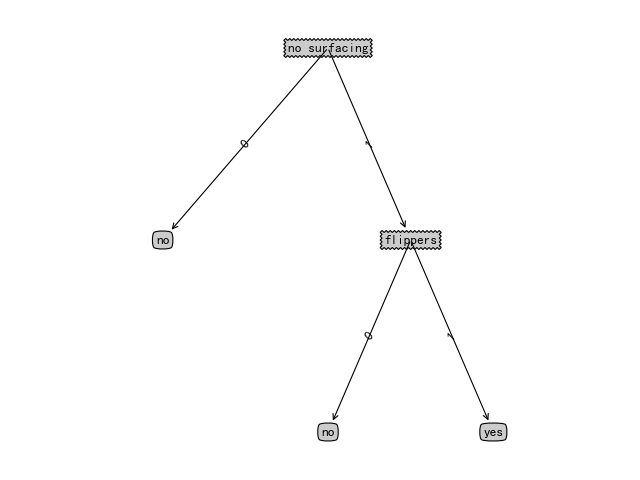

In [153]:
createPlot(myTree)

In [70]:
#导入相应的包
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz
#特征
Xtrain = dataSet.iloc[:,:-1]
#标签
Ytrain = dataSet.iloc[:,-1]
labels = Ytrain.unique().tolist()
Ytrain = Ytrain.apply(lambda x: labels.index(x))  #将本文转换为数字

In [74]:
(dataSet.iloc[:,-1] == 'yes').astype('int')

0    1
1    1
2    0
3    0
4    0
Name: fish, dtype: int32

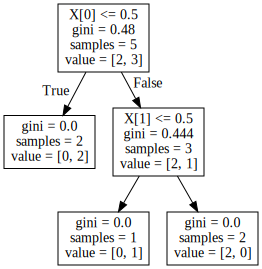

In [75]:
#绘制树模型
clf = DecisionTreeClassifier()
clf = clf.fit(Xtrain, Ytrain)
tree.export_graphviz(clf)
dot_data = tree.export_graphviz(clf, out_file=None)
graphviz.Source(dot_data)

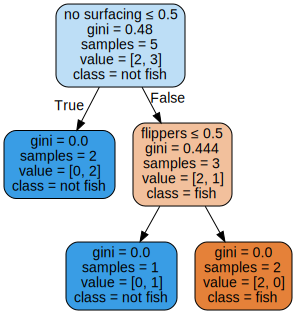

In [78]:
#给图形增加标签和颜色
dot_data = tree.export_graphviz(clf, out_file=None,
                               feature_names=['no surfacing', 'flippers'],
                               class_names=['fish', 'not fish']
                               ,filled=True, rounded=True,
                               special_characters=True)
graphviz.Source(dot_data)

In [13]:
#利用render方法生成图形
graph = graphviz.Source(dot_data)
graph.render("fish")

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


'fish.pdf'

In [14]:
Ytrain = dataSet.iloc[:,-1]

In [15]:
Ytrain.unique().tolist()

['yes', 'no']

In [22]:
(Ytrain == 'yes').astype('int')

0    1
1    1
2    0
3    0
4    0
Name: fish, dtype: int32